In [1]:
# data manipulation 
import numpy as np
import pandas as pd



from datetime import datetime
import itertools as it

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR

from sklearn.model_selection import TimeSeriesSplit
from sklearn import metrics
from fbprophet import Prophet
%matplotlib inline
pd.plotting.register_matplotlib_converters()

import math

# data visualization 

import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings("ignore")
import acquire
import prep
import model 

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


#### Accquire

In [2]:
df= acquire.get_df()
df= prep.prep_df()

target_vars=['Steps']

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
Date                      225 non-null datetime64[ns]
Calories Burned           225 non-null float64
Steps                     225 non-null float64
Distance                  225 non-null float64
Floors                    225 non-null float64
Minutes Sedentary         225 non-null float64
Minutes Lightly Active    225 non-null float64
Minutes Fairly Active     225 non-null float64
Minutes Very Active       225 non-null float64
Activity Calories         225 non-null float64
dtypes: datetime64[ns](1), float64(9)
memory usage: 17.7 KB


,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,3401.911111,8536.186667,4.046800,7.155556,809.520000,188.235556,14.920000,33.871111,1484.546667
std,632.426578,5255.746608,2.506253,5.710093,243.232639,75.170001,15.363535,37.195986,747.795790
min,799.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000
25%,3069.000000,4714.000000,2.220000,2.000000,654.000000,158.000000,3.000000,2.000000,1062.000000
50%,3385.000000,7806.000000,3.680000,7.000000,750.000000,203.000000,11.000000,15.000000,1481.000000
75%,3765.000000,12380.000000,5.900000,11.000000,877.000000,236.000000,21.000000,63.000000,1962.000000
max,5199.000000,25512.000000,12.000000,23.000000,1440.000000,349.000000,78.000000,154.000000,3596.000000


#### Split Data

In [4]:
train, test= prep.test_train_split(df, .66)
print('Observations: %d' % (len(df)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 225
Training Observations: 148
Testing Observations: 77


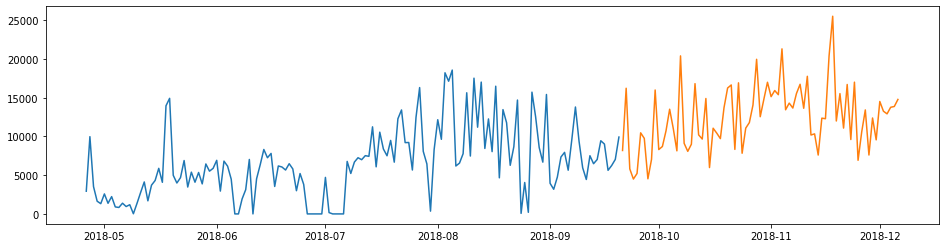

In [5]:
for var in range(len(target_vars)):
    plt.figure(figsize=(16, 4))
    plt.plot(train[target_vars[var]])
    plt.plot(test[target_vars[var]])
    plt.show()

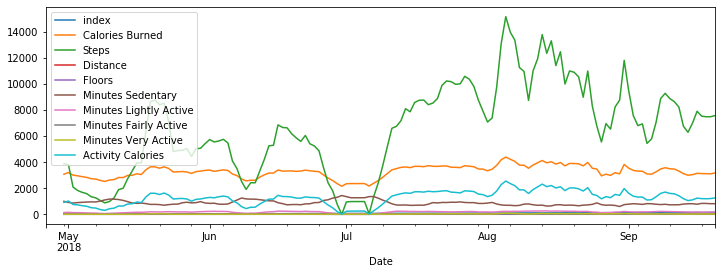

In [6]:
#Moving Average
train.rolling(5).mean().plot(figsize=(12, 4))
plt.show()

In [7]:
#Last observed value
yhat = pd.DataFrame(test[target_vars])
for var in target_vars:
    yhat[var] = int(train[var][-1:])
yhat.head()

,Steps
Date,
2018-09-21,9920
2018-09-22,9920
2018-09-23,9920
2018-09-24,9920
2018-09-25,9920


In [8]:
for var in target_vars:
    print(var, ":", yhat[var].min() == yhat[var].max())

Steps : True


In [9]:
model.evaluate(target_vars, train = train, test = test, output=True)
#model.plot_and_eval(target_vars=target_vars, train = train, test = test)


NameError: name 'metrics' is not defined

In [ ]:

model.nex`